In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tiktok_dataset.csv


In [2]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
df = pd.read_csv("/kaggle/input/tiktok_dataset.csv")

In [5]:
# Explore data with EDA

# Display first few rows
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [6]:
# Get number of rows and columns
df.shape

(19382, 12)

In [7]:
# Get data types of columns
df.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [8]:
# Get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [9]:
# Generate basic descriptive stats
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [10]:
# Check for missing values
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [11]:
# Drop rows with missing values
df = df.dropna(axis=0)

In [12]:
# Check for duplicates
df.duplicated().sum()

0

In [13]:
# Display first few rows after handling missing values
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [14]:
# Preprocessing text
def clean_text(text):
    if not isinstance(text, str):
        return ""  # Return an empty string for non-string entries
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in word_tokenize(text) if word not in stop_words])

df['cleaned_text'] = df['video_transcription_text'].apply(clean_text)

In [15]:
# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.05:
        return 'positive'
    elif analysis.sentiment.polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'
df['sentiment_label'] = df['cleaned_text'].apply(get_sentiment)

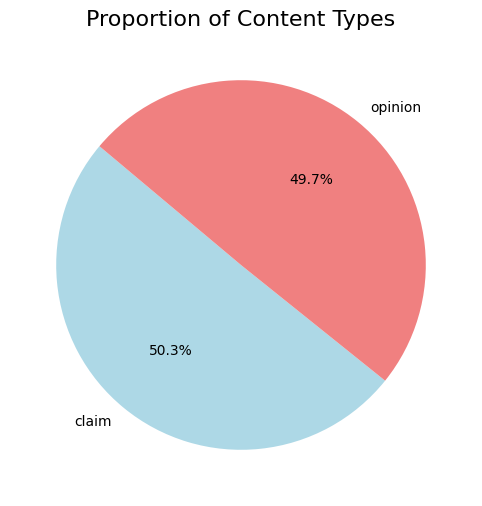

In [16]:
# Count the occurrences of each content type
content_counts = df['claim_status'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140)
plt.title('Proportion of Content Types', fontsize=16)
plt.show()


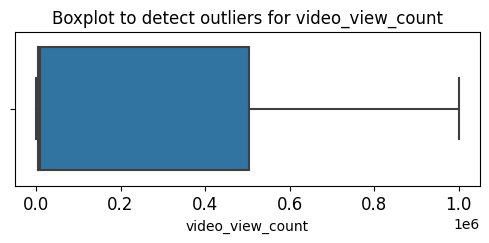

In [17]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_view_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_view_count'])
plt.show()

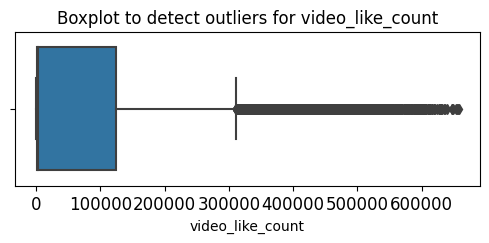

In [18]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_like_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_like_count'])
plt.show()

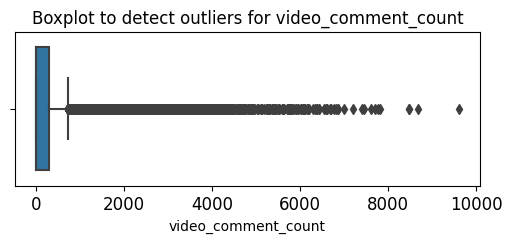

In [19]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_comment_count'])
plt.show()

In [20]:
# Topic Modeling
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_text'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}: {[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]}")

Topic 1: ['colleagues', 'world', 'friends', 'friend', 'colleague', 'discovered', 'media', 'learned', 'read', 'claim']
Topic 2: ['world', 'colleagues', 'friends', 'friend', 'media', 'discovered', 'colleague', 'learned', 'read', 'claim']
Topic 3: ['colleagues', 'discovered', 'friends', 'friend', 'colleague', 'media', 'world', 'learned', 'read', 'claim']
Topic 4: ['solar', 'colleagues', 'discovered', 'friends', 'colleague', 'media', 'friend', 'learned', 'read', 'claim']
Topic 5: ['people', 'discovered', 'colleagues', 'friends', 'colleague', 'media', 'friend', 'learned', 'read', 'claim']


sentiment_label
neutral     12410
positive     4198
negative     2476
Name: count, dtype: int64


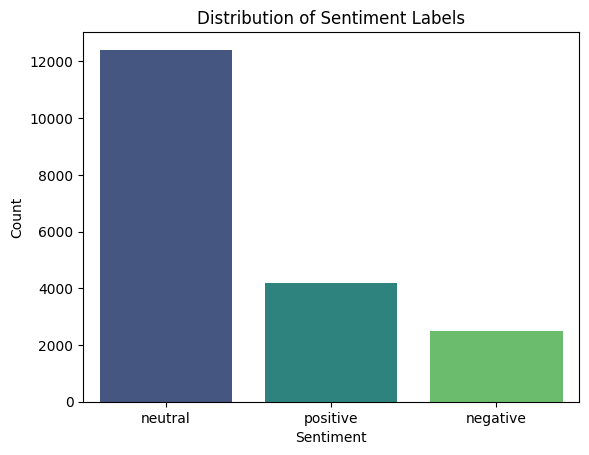

In [21]:
# Count sentiment labels
sentiment_counts = df['sentiment_label'].value_counts()
print(sentiment_counts)

# Visualize sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

                 video_view_count  video_like_count  video_share_count
sentiment_label                                                       
negative            261222.686995      85967.900646       17206.694669
neutral             269597.725947      89590.139081       17766.717969
positive            206851.591710      67698.791329       13407.987851


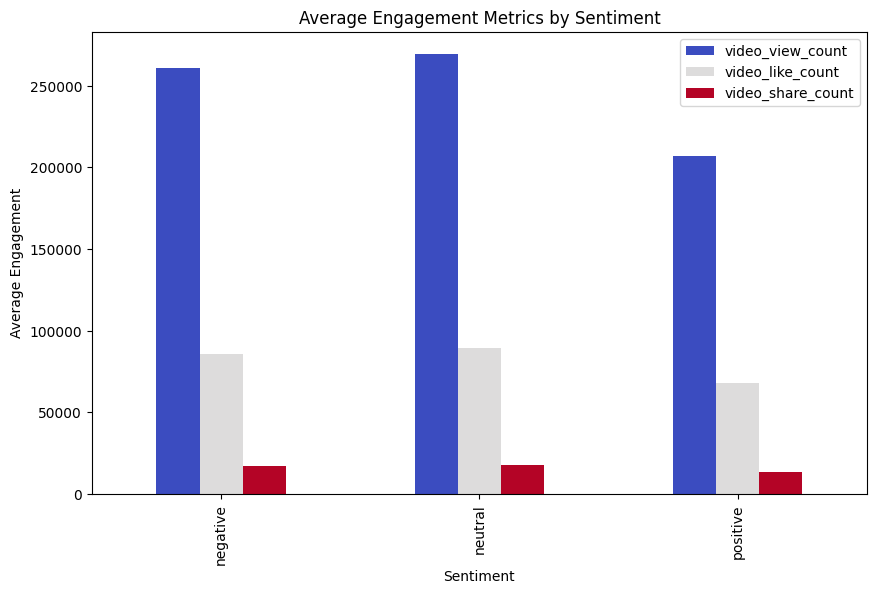

In [22]:
# Group data by sentiment label
sentiment_engagement = df.groupby('sentiment_label')[['video_view_count', 'video_like_count', 'video_share_count']].mean()
print(sentiment_engagement)

# Visualize sentiment vs engagement metrics
sentiment_engagement.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Average Engagement Metrics by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Engagement')
plt.legend(['video_view_count', 'video_like_count', 'video_share_count'])
plt.show()

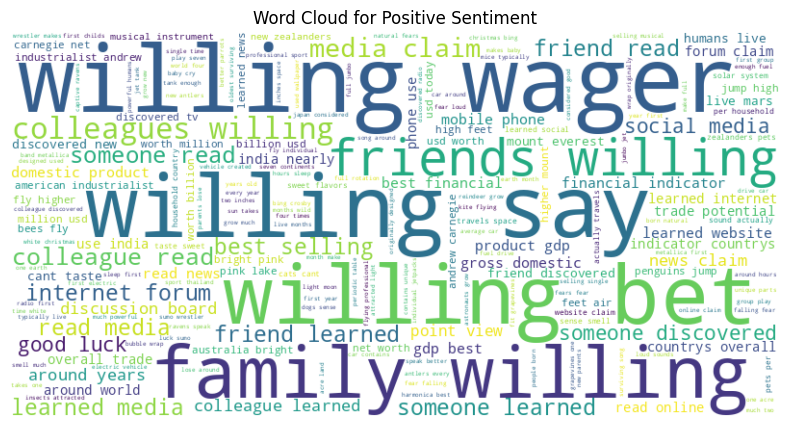

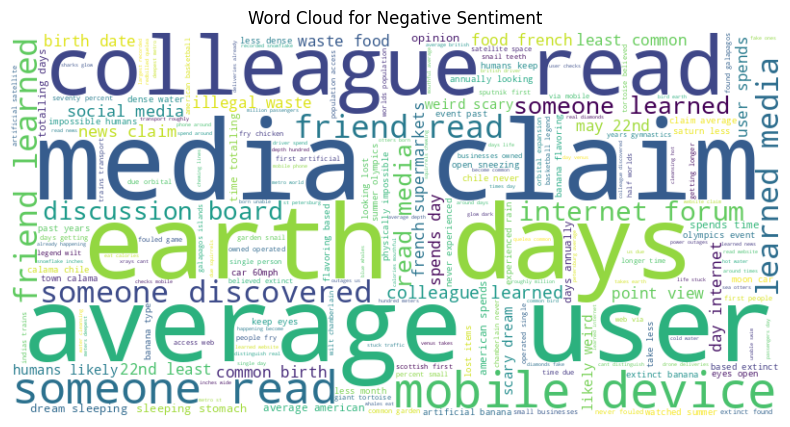

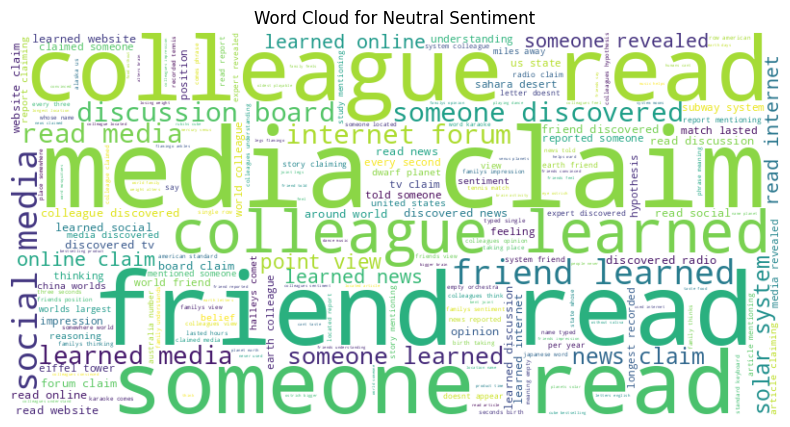

In [23]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
for sentiment in ['positive', 'negative', 'neutral']:
    text = ' '.join(df[df['sentiment_label'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

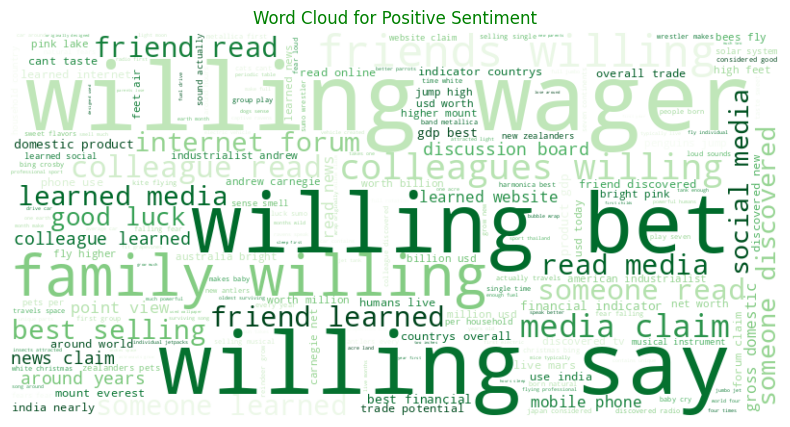

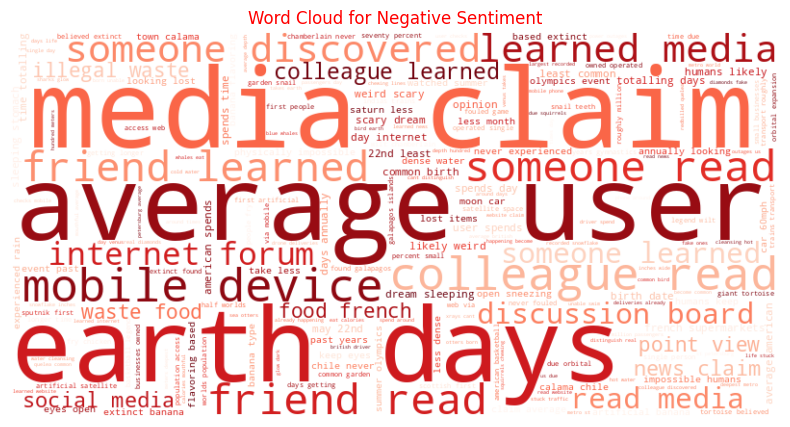

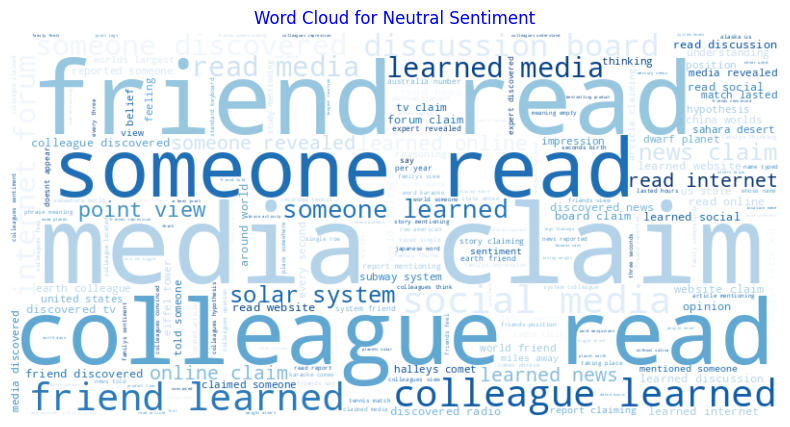

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

colormap_dict = {
    'positive': 'Greens',
    'negative': 'Reds',
    'neutral': 'Blues'
}

# Generate word clouds for each sentiment
for sentiment in ['positive', 'negative', 'neutral']:
    text = ' '.join(df[df['sentiment_label'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap_dict[sentiment]).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment', color=colormap_dict[sentiment].split('s')[0].lower())
    plt.axis('off')
    plt.show()


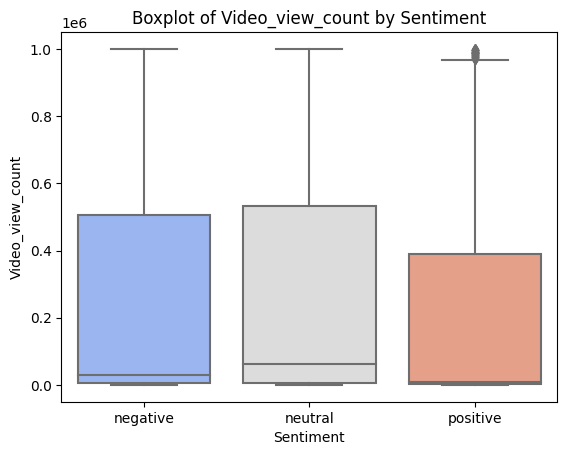

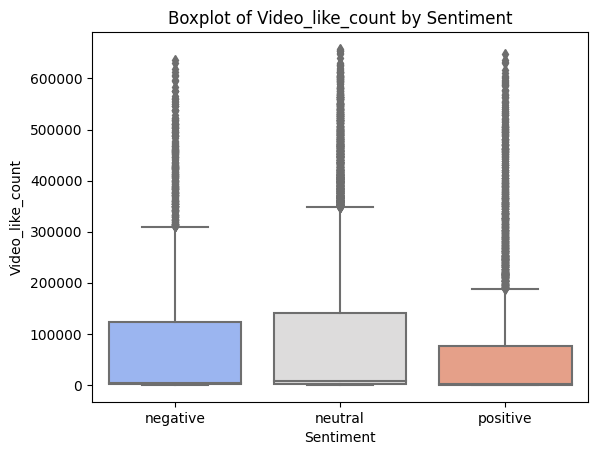

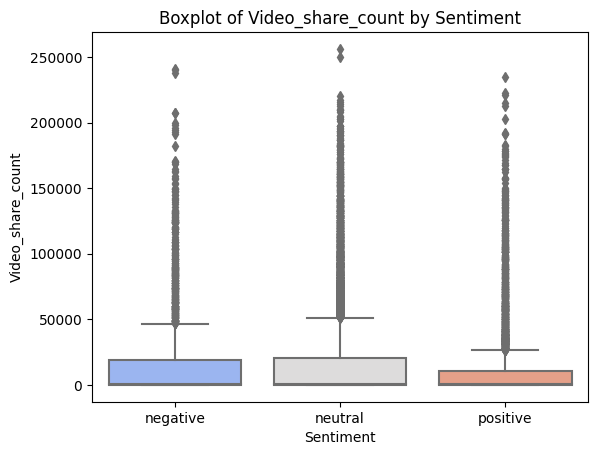

In [25]:
# Boxplot of engagement metrics by sentiment
for metric in ['video_view_count', 'video_like_count', 'video_share_count']:
    sns.boxplot(x='sentiment_label', y=metric, data=df, palette='coolwarm')
    plt.title(f'Boxplot of {metric.capitalize()} by Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel(metric.capitalize())
    plt.show()

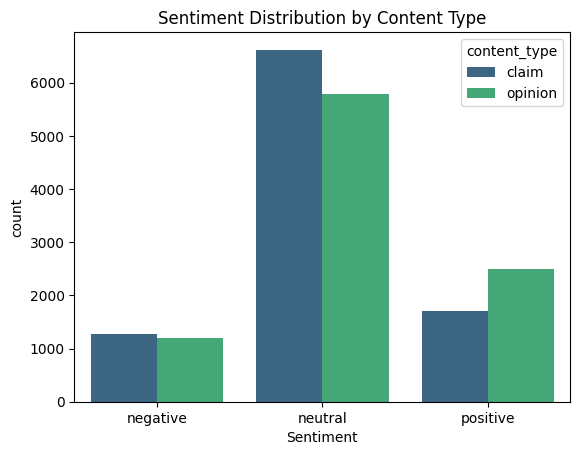

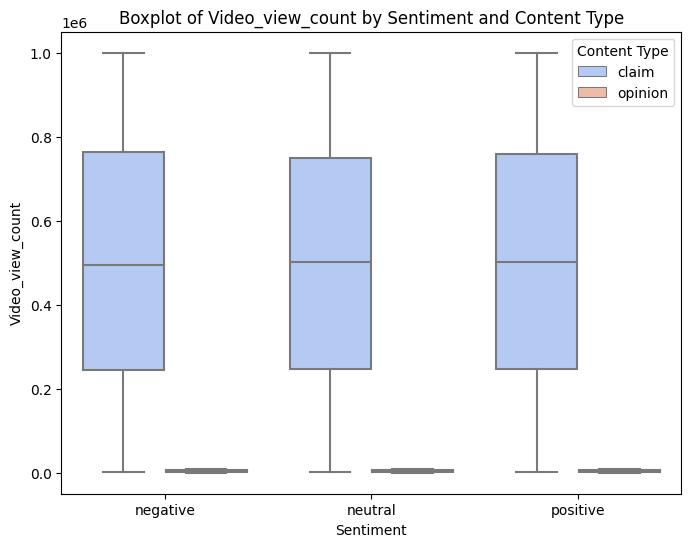

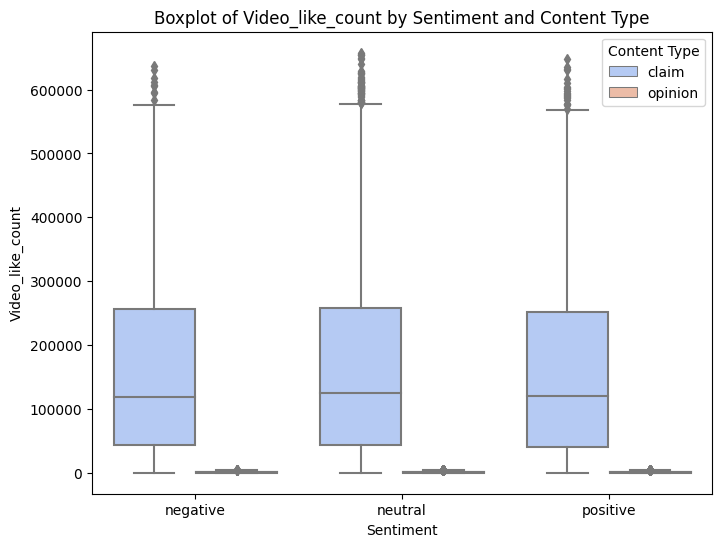

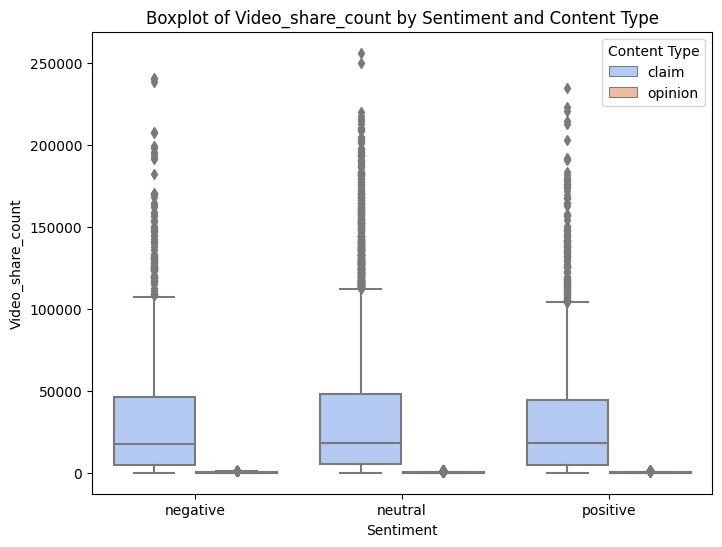

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


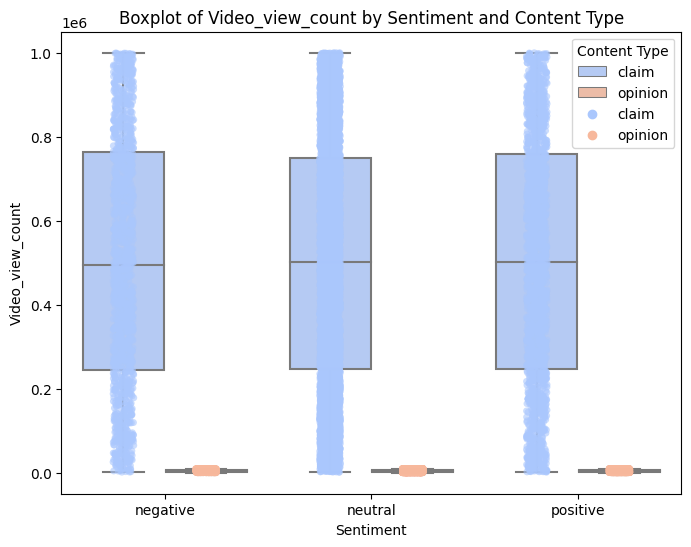

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


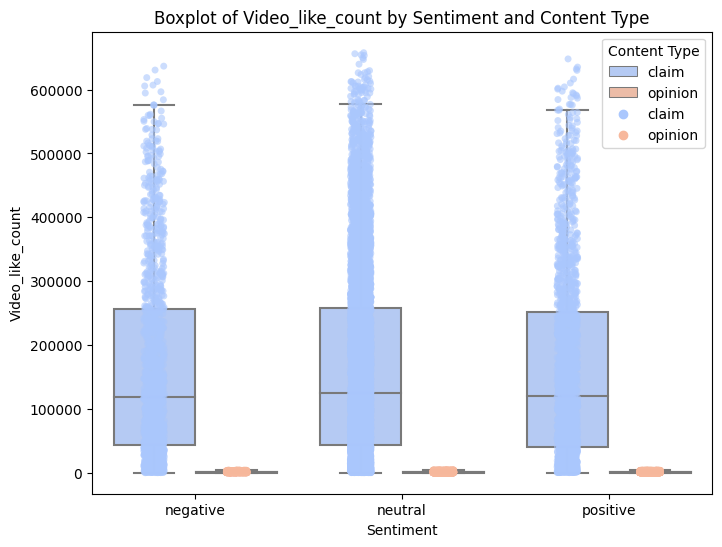

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


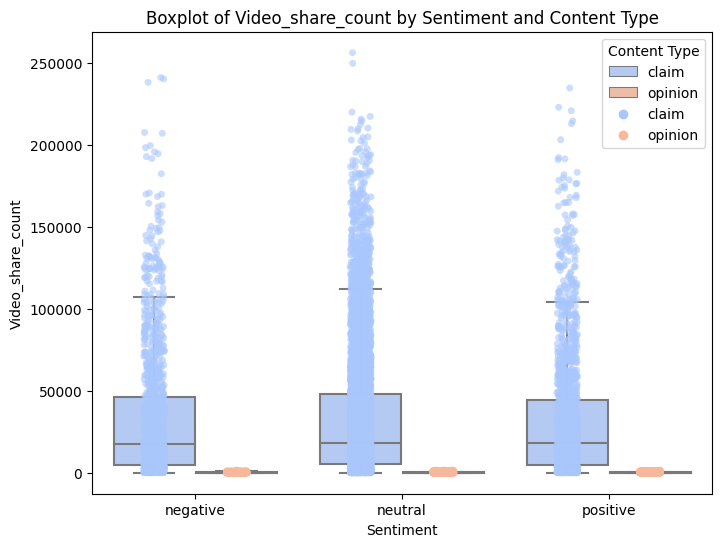

In [26]:
# Visualization
sns.countplot(data=df, x='sentiment_label', hue='claim_status', palette='viridis')
plt.title("Sentiment Distribution by Content Type")
plt.legend(title='content_type') 
plt.xlabel('Sentiment')
plt.show()

# Boxplot of engagement metrics by sentiment and content type
for metric in ['video_view_count', 'video_like_count', 'video_share_count']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='sentiment_label', y=metric, hue='claim_status', data=df, palette='coolwarm')
    plt.title(f'Boxplot of {metric.capitalize()} by Sentiment and Content Type')
    plt.xlabel('Sentiment')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Content Type')
    plt.show()

# Boxplot of engagement metrics by sentiment and content type with color density
for metric in ['video_view_count', 'video_like_count', 'video_share_count']:
    plt.figure(figsize=(8, 6))
    
    # Boxplot
    sns.boxplot(x='sentiment_label', y=metric, hue='claim_status', data=df, palette='coolwarm', showfliers=False)
    
    # Stripplot to show the density of the data points
    sns.stripplot(x='sentiment_label', y=metric, hue='claim_status', data=df, palette='coolwarm', jitter=True, dodge=True, alpha=0.6, size=5)
    
    plt.title(f'Boxplot of {metric.capitalize()} by Sentiment and Content Type')
    plt.xlabel('Sentiment')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Content Type')
    plt.show()

    
# Save results for the paper
df.to_csv("tiktok_analysis_results.csv", index=False)

